## Load Log Files

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [79]:
directory = "./Logs/"
save_path = "./Saved/"

### Reload Log Files

In [80]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [81]:
import pandas as pd
import numpy as np
import re
import os
import pickle
import sys
import random

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [82]:
n_clusters = 10

## Evaluate the Count Vectorizer Parameter

In [83]:
min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_val = 10

In [46]:
def features_param_metrics(logs, gram):
    vms = []
    fms = []
    for i in range(n_val):
        vmn = []
        fmn = []
        
        random_val = random.randint(1, 45)
        for min_df_val in min_df_vals:
            labels_ = log_labels
            
            X = get_features(logs, gram, min_df_val)
            X = X.toarray()
    
            idxs = np.where(np.all(X == 0, axis=1))

            X = np.delete(X, idxs, axis=0)
            labels_ = np.delete(labels_, idxs)

            kmeans = KMeans(init="k-means++", n_clusters=n_clusters, random_state=random_val).fit(X)
            labels = kmeans.labels_

            vm = evaluate_vmeasure(labels_, labels)
            vmn.append(vm)
            
            fm = evaluate_fm(labels_, labels)
            fmn.append(fm)
        
        vmn.append(random_val)
        fmn.append(random_val)
        
        vms.append(vmn)
        fms.append(fmn)
        
    return vms, fms
    
        

In [47]:
def find_best_param(vms, fms):
    vsums = np.sum(vms, axis=0)
    fsums = np.sum(fms, axis=0)
    
    print(np.argmin(np.std(vms, axis=0)))
    print(np.argmin(np.std(fms, axis=0)))
    
    return np.argmax(vsums/n_val), np.argmax(fsums/n_val)

In [48]:
def plot_features_performance(metrics, title):
    sns.set(style='white', context='poster', rc={'figure.figsize':(14,8)})
    plt.figure(0).clf()
    plt.title(title)
    i=0
    for mm in metrics:
        plt.plot(min_df_vals, mm, label=str(i))
        i+=1

        plt.legend(loc=0)


In [49]:
vms, fms = features_param_metrics(logs, 2)

In [50]:
header = min_df_vals[:] 
header.extend(["Seed"])

tab_results(header, vms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.8611813007001022 | 0.8526015330875536 | 0.886188952542138  | 0.8522577013253559 | 0.902723848455378  | 0.8397925834671577 | 0.8513738101535256 | 0.8513738101535256 | 0.8375134253305572 | 0.8505550849798046 |  41  |
| 0.8584023657726269 | 0.8448879367883487 | 0.8977630351107154 | 0.8571110419439536 | 0.8510215679294062 | 0.880541737393229

In [51]:
tab_results(header, fms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.7641997748016027 | 0.7534040612438552 | 0.8008899053120061 | 0.7249724406359418 | 0.8258739547495849 | 0.7192897996317162 | 0.6997546466656995 | 0.6997546466656995 | 0.693090489773535  | 0.6966848538945698 |  41  |
| 0.7356558965857448 | 0.6862502255868808 | 0.8203124403125192 | 0.7646020611354918 | 0.6994216242316358 | 0.781437666603338

In [52]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

3
1


In [53]:
indvm, indfm

(4, 4)

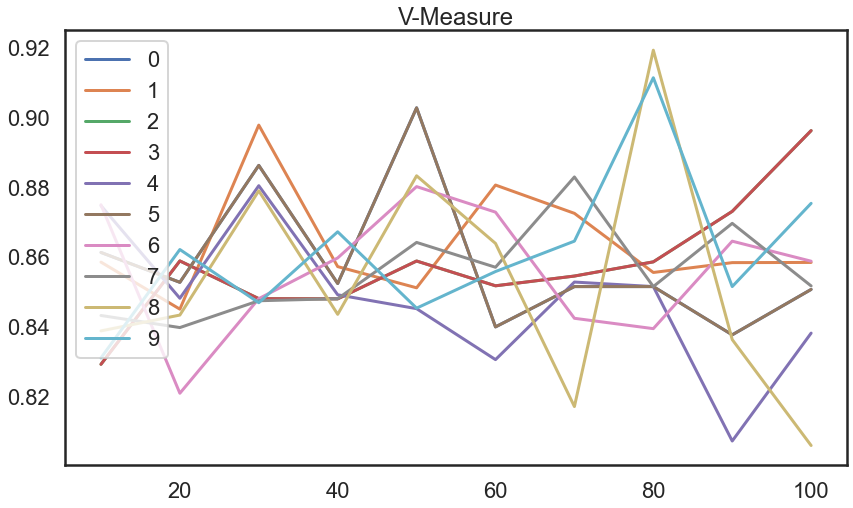

In [54]:
plot_features_performance(vms, "V-Measure")

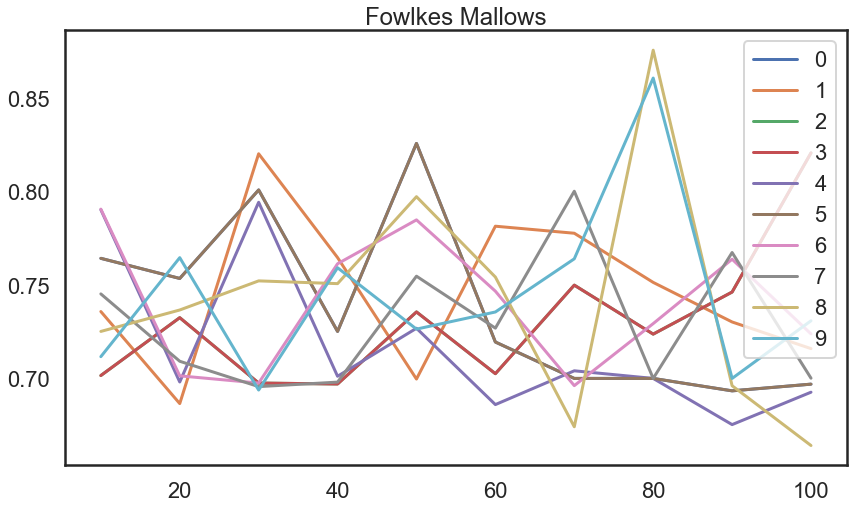

In [55]:
plot_features_performance(fms, "Fowlkes Mallows")

In [56]:
vms, fms = features_param_metrics(logs, 3)

In [57]:
header = min_df_vals[:]
header.extend(["Seed"])

tab_results(header, vms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.7939051041525763 | 0.8768517516543538 | 0.8754322120441105 | 0.841377947871947  | 0.8592955460984174 | 0.852162544308195  | 0.8700088022233651 | 0.8352914763175299 | 0.8971762087111573 | 0.8452500439749272 |  19  |
| 0.8587881743166695 | 0.8379659298665664 | 0.818676410660582  | 0.8334860333214421 | 0.8409773227451216 | 0.843878944021636

In [58]:
tab_results(header, fms)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
|         10         |         20         |         30         |         40         |         50         |         60         |         70         |         80         |         90         |        100         | Seed |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+
| 0.6555116732469719 | 0.7886656856883418 | 0.7543513504823279 | 0.7465040716088696 | 0.7619280160718903 | 0.7178483967553523 | 0.7423446706429909 | 0.7259094867735808 | 0.8298216309814455 | 0.7079522677144745 |  19  |
| 0.7783251159824827 | 0.6872898435060736 | 0.6933115513721085 | 0.7000408032546246 | 0.7348520859505407 | 0.728038411265432

In [59]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

4
7


In [60]:
indvm, indfm

(8, 8)

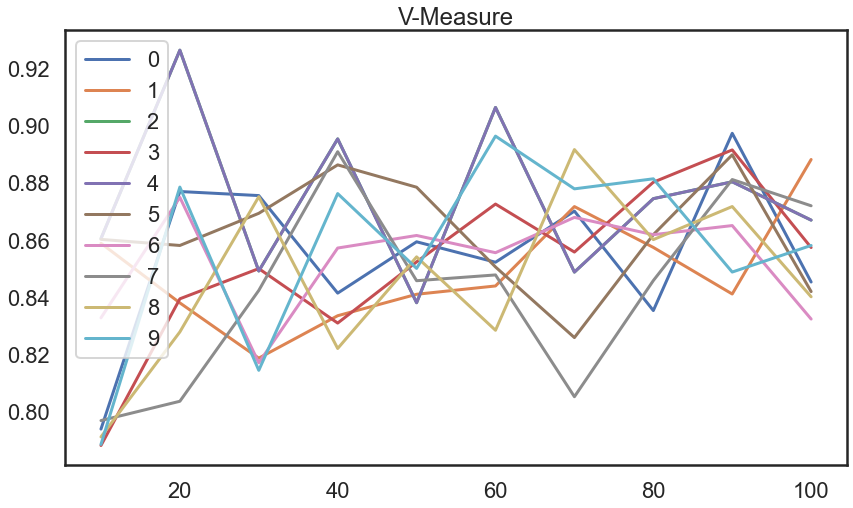

In [61]:
plot_features_performance(vms, "V-Measure")

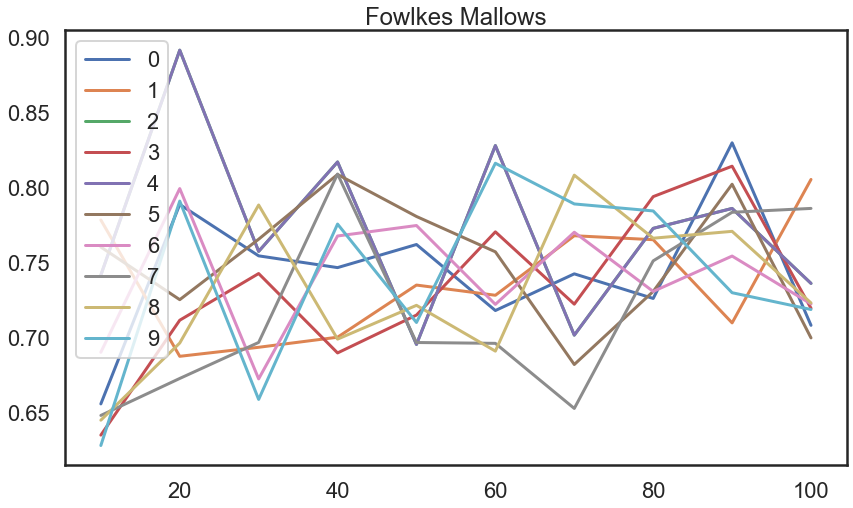

In [62]:
plot_features_performance(fms, "Fowlkes Mallows")

## Bigram Feature Vectorizer

In [168]:
eval_results = []

In [169]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [170]:
X.shape

(27093, 1633)

In [171]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


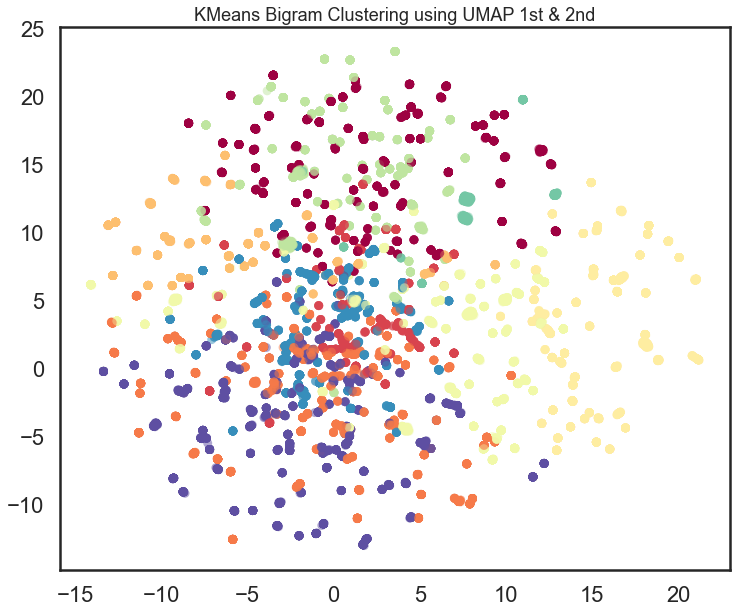

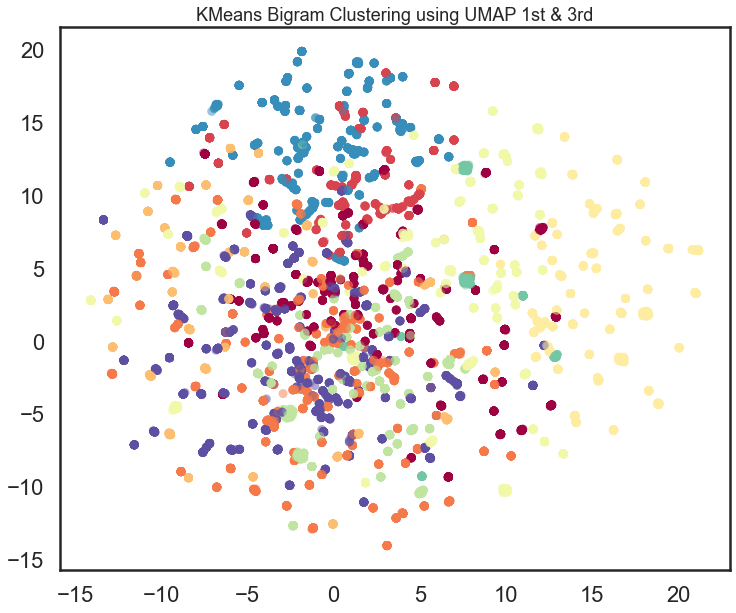

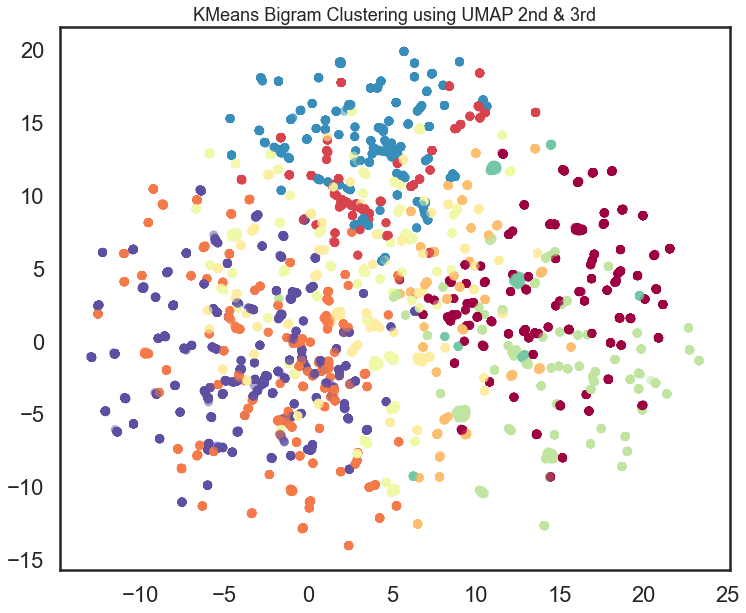

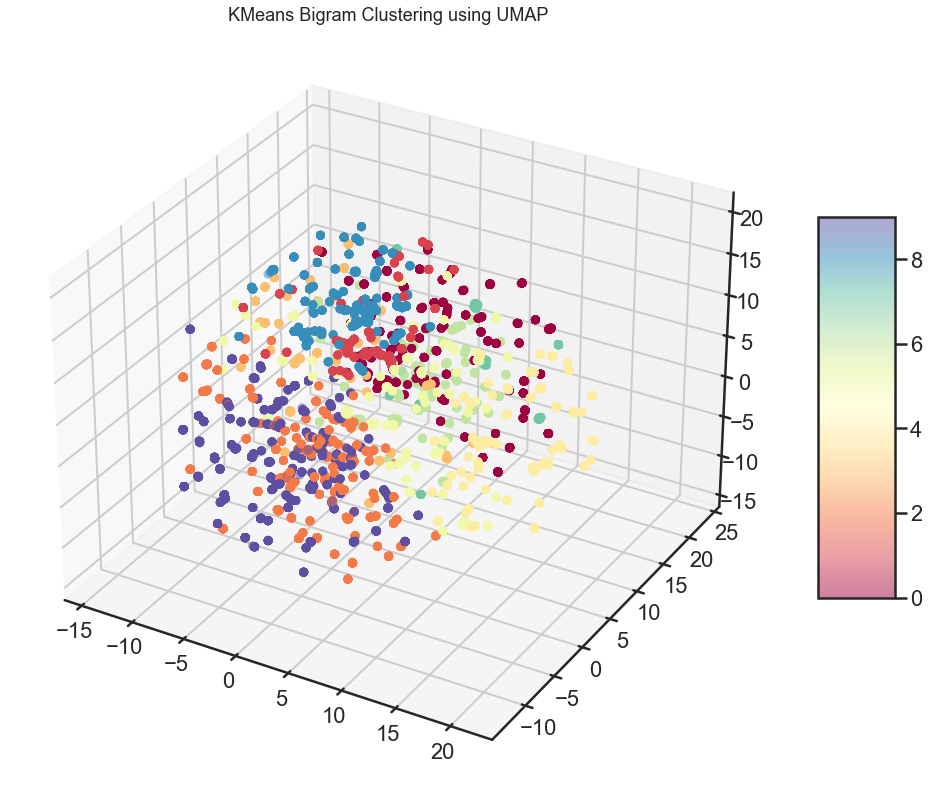

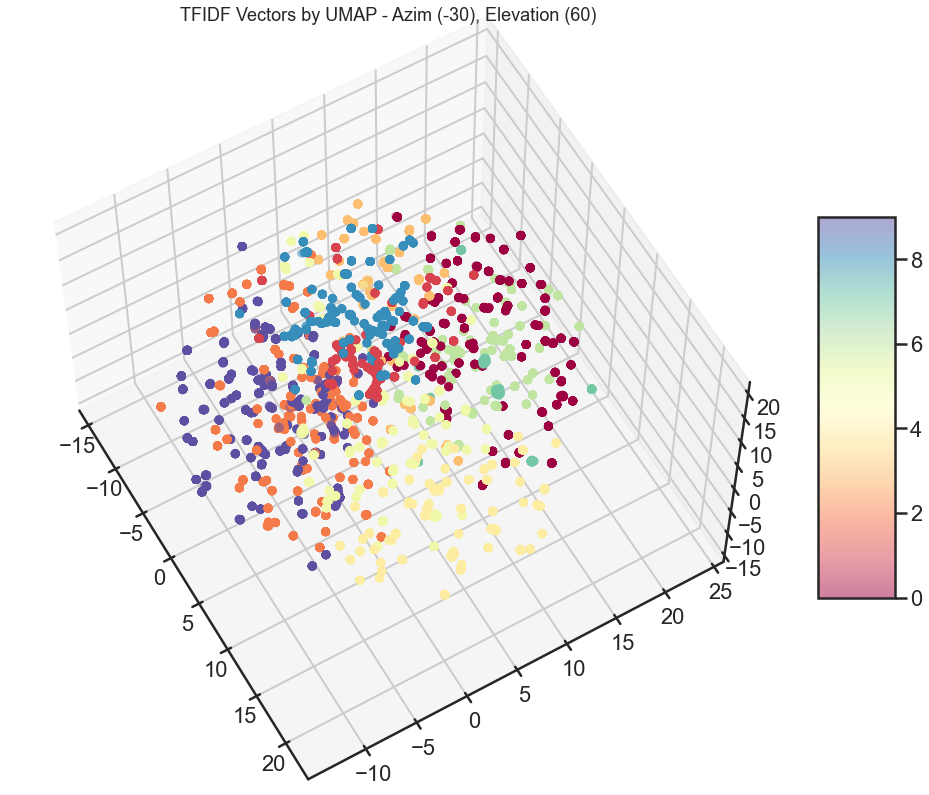

In [172]:
plot_clusters("KMeans Bigram Clustering using UMAP", X, labels)

In [173]:
results = evaluate_clustering('KMeans Bigram Clustering', X, labels_, labels)
print(results)

['KMeans Bigram Clustering', '0.87', '0.89', '0.88', '0.76', '0.88', '0.79']


In [174]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [175]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()
idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [176]:
X.shape

(27004, 1906)

In [177]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

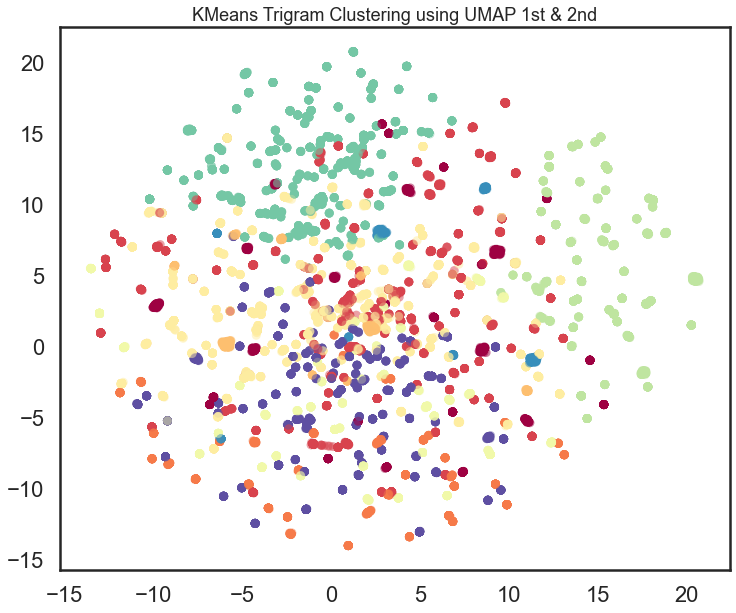

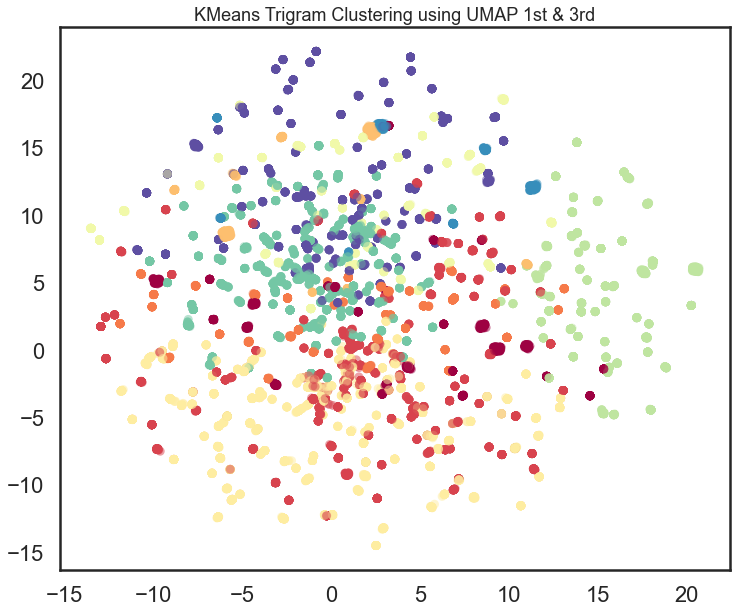

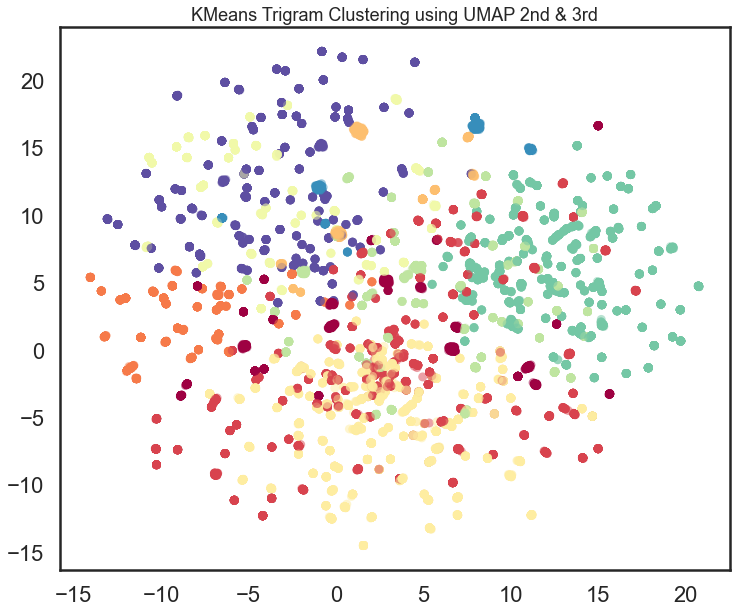

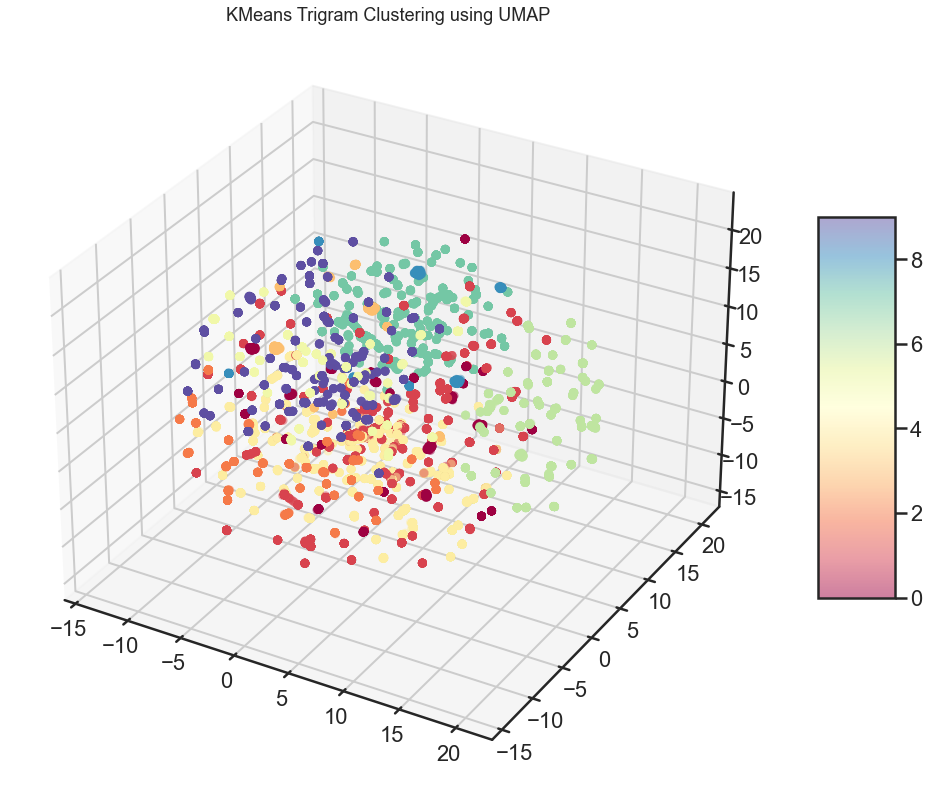

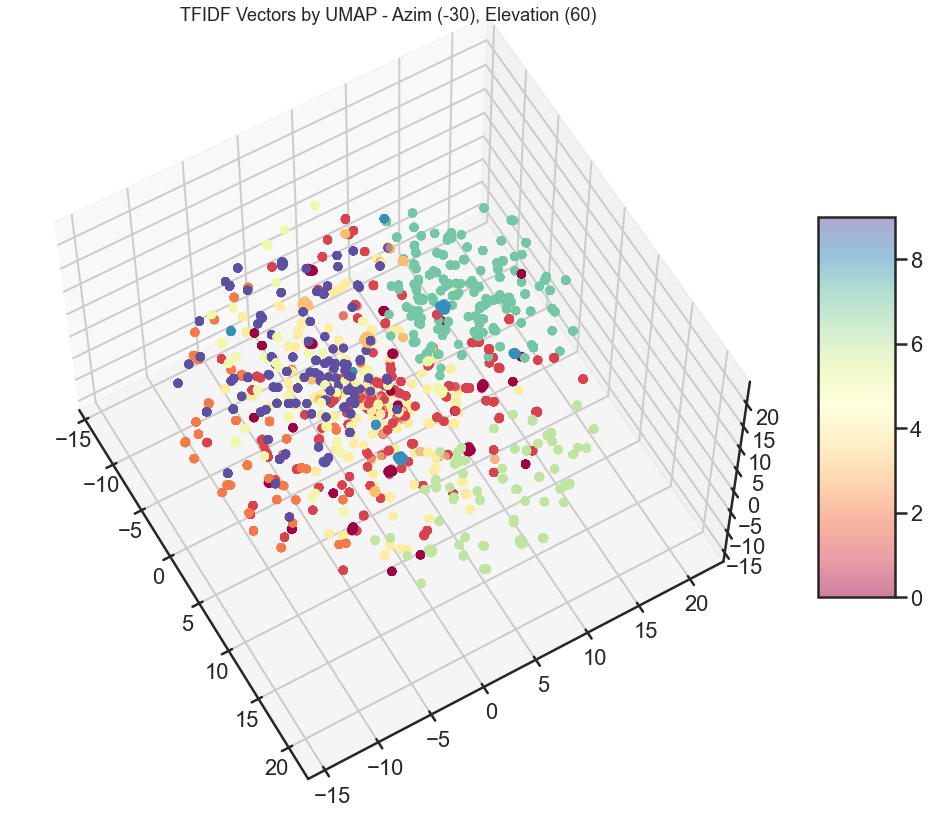

In [178]:
plot_clusters("KMeans Trigram Clustering using UMAP", X, labels)

In [179]:
results = evaluate_clustering('KMeans Trigram Clustering', X, labels_, labels)
print(results)

['KMeans Trigram Clustering', '0.86', '0.88', '0.87', '0.75', '0.87', '0.78']


In [180]:
eval_results.append(results)

In [181]:
tabulate_results(eval_results)

+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|            Name           | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|  KMeans Bigram Clustering |     0.87    |     0.89     |    0.88   |      0.76      |        0.88       |       0.79      |
| KMeans Trigram Clustering |     0.86    |     0.88     |    0.87   |      0.75      |        0.87       |       0.78      |
+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
